In [1]:
import numpy as np
import math
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import cg, eigs
from scipy.interpolate import interp2d
import matplotlib as mpl
import matplotlib.pyplot as plt

# Capítulo 5

## Exemplo 5.1

In [2]:
A = np.array([[-7, 0, 2], [7, -8, 0], [0, 8, -8]])
B = np.array([-50, -1, 0])
C = linalg.solve(A, B)
print(C)

[9.57142857 8.5        8.5       ]


## Exemplo 5.2

In [3]:
A = np.array([[-250, 0, 40], [240, -250, 0], [0, 240, -250]])
B = np.array([-6500, -2500, -2500])
# T = linalg.solve(A, B)
T = linalg.inv(A) @ B
print(T)

[34.17536221 42.80834772 51.09601381]


## Diferenciação Numérica

In [4]:
def diff(f, x, dx = 1e-6):
    df = list()
    x_orig = x.copy()
    for i in range(len(x_orig)):
        x[i] += dx
        df.append((np.array(f(x)) - np.array(f(x_orig))) / dx)
        x = x_orig.copy()
    df = np.array(df).transpose()
    df = [list(i) for i in df]
    return df

## Newton-Rhapson para Sistemas de Equações Não Lineares

In [5]:
def newton_rhapson(f, x_est, df = None, i_max = 20, dx = 1e-6):
    x = [list(x_est)]
    for i in range(i_max):
        X = np.array(x[i])
        if df is None:
            dF = np.array(diff(f, x[i], dx))
        else:
            dF = np.array(df(X))
        F = np.array(f(X))
        X = X - linalg.inv(dF) @ F
        x.append(list(X))
    return x

## Exemplo da Seção 5.2.1

In [6]:
def f(x):
    Ca = x[0]
    Cb = x[1]
    u = Ca + 0.06*Ca*Cb - 200
    v = Cb + 0.06*Ca*Cb - 200
    return [u, v]

def df(x):
    Ca = x[0]
    Cb = x[1]
    du_dCa = 1 + 0.06*Cb
    du_dCb = 0.06 * Ca
    dv_dCa = 0.06 * Cb
    dv_dCb = 1 + 0.06*Ca
    return [[du_dCa, du_dCb], [dv_dCa, dv_dCb]]

In [7]:
C = newton_rhapson(f, [200, 200], df, i_max = 6)
for i, v in enumerate(C):
    print(i, v)

0 [200, 200]
1 [103.99999999999977, 104.0]
2 [62.979228486646804, 62.97922848664683]
3 [51.18114093652843, 51.18114093652841]
4 [50.011720627032815, 50.01172062703282]
5 [50.00000117724716, 50.000001177247164]
6 [50.000000000000014, 50.00000000000002]


In [8]:
a = df([200, 200])
print(a)
b = diff(f, [200, 200], 1e-4)
print(b)

[[13.0, 12.0], [12.0, 13.0]]
[[12.99999999901047, 12.000000001535227], [11.999999996987754, 13.000000003557943]]


### Problema Proposto 5.1

In [9]:
A = np.array([[0.50, 0.33, 0], [0.50, 0.33, 0.70], [0, 0.34, 0.30]])
print(A)

[[0.5  0.33 0.  ]
 [0.5  0.33 0.7 ]
 [0.   0.34 0.3 ]]


In [10]:
B = np.array([0.30, 0.40, 0.30]) * 100
print(B)

[30. 40. 30.]


In [11]:
F = linalg.inv(A) @ B
print(F)
print(sum(F))

[10.08403361 75.6302521  14.28571429]
100.0


### Problema Proposto 5.2

In [12]:
Qin, Q32, Q43 = 10, 5, 3
V1, V2, V3, V4 = 25, 75, 100, 25
k1, k2, k3, k4 = 0.075, 0.15, 0.4, 0.1
Cain = 1

In [13]:
A = np.array([
    [-1, 0, 0, 0],
    [1, -1, 0, 0],
    [0, 1, -1, 0],
    [0, 0, 1, -1]
])
print(A)

[[-1  0  0  0]
 [ 1 -1  0  0]
 [ 0  1 -1  0]
 [ 0  0  1 -1]]


In [14]:
B = np.array([-Qin, -Q32, -Q43+Q32, Q43])
print(B)

[-10  -5   2   3]


In [15]:
Q = linalg.inv(A) @ B
print(Q)
Q12, Q23, Q34, Qout = Q

[10. 15. 13. 10.]


In [16]:
A = np.array([
    [-Q12-k1*V1, 0, 0, 0],
    [Q12, -Q23-k2*V2, Q32, 0],
    [0, Q23, -Q34-Q32-k3*V3, Q43],
    [0, 0, Q34, -Qout-Q43-k4*V4]
])
print(A)

[[-11.875   0.      0.      0.   ]
 [ 10.    -26.25    5.      0.   ]
 [  0.     15.    -58.      3.   ]
 [  0.      0.     13.    -15.5  ]]


In [17]:
B = np.array([-Qin*Cain, 0, 0, 0])
print(B)

[-10   0   0   0]


In [18]:
C = linalg.inv(A) @ B
print(C)

[0.84210526 0.33821858 0.091437   0.0766891 ]


### Problema Proposto 5.3

In [19]:
def f(x):
    Ca, Cb, Cc, Cd = x
    Cain, Cbin, Ccin, Cdin = 0.7, 0.4, 0, 0
    F = 5 / 60
    k = 0.855
    V = 40
    ua = F*(Cain - Ca) - k*Ca*Cb*V
    ub = F*(Cbin - Cb) - k*Ca*Cb*V
    uc = F*(Ccin - Cc) + k*Ca*Cb*V
    ud = F*(Cdin - Cd) + k*Ca*Cb*V
    return [ua, ub, uc, ud]

In [20]:
def df(x):
    Ca, Cb, Cc, Cd = x
    # Cain, Cbin, Ccin, Cdin = 0.7, 0.4, 0, 0
    F = 5 / 60
    k = 0.855
    V = 40
    dua_dCa = -F - k*Cb*V
    dua_dCb = -k*Ca*V
    dua_dCc = 0
    dua_dCd = 0
    dub_dCa = -k*Cb*V
    dub_dCb = -F - k*Ca*V
    dub_dCc = 0
    dub_dCd = 0
    duc_dCa = k*Cb*V
    duc_dCb = k*Ca*V
    duc_dCc = -F
    duc_dCd = 0
    dud_dCa = k*Cb*V
    dud_dCb = k*Ca*V
    dud_dCc = 0
    dud_dCd = -F
    return [
        [dua_dCa, dua_dCb, dua_dCc, dua_dCd],
        [dub_dCa, dub_dCb, dub_dCc, dub_dCd],
        [duc_dCa, duc_dCb, duc_dCc, duc_dCd],
        [dud_dCa, dud_dCb, dud_dCc, dud_dCd]
    ]

In [21]:
x = [0.7, 0.4, 0, 0]
a = df(x)
print(a)
b = diff(f, x, 1e-4)
print(b)

[[-13.763333333333335, -23.939999999999998, 0, 0], [-13.680000000000001, -24.02333333333333, 0, 0], [13.680000000000001, 23.939999999999998, -0.08333333333333333, 0], [13.680000000000001, 23.939999999999998, 0, -0.08333333333333333]]
[[-13.76333333334756, -23.940000000006734, 0.0, 0.0], [-13.68000000001146, -24.023333333342833, 0.0, 0.0], [13.68000000001146, 23.940000000006734, -0.08333333333609971, 0.0], [13.68000000001146, 23.940000000006734, 0.0, -0.08333333333609971]]


In [22]:
C = newton_rhapson(f, [0.7, 0.4, 0, 0], i_max = 10)
for i, v in enumerate(C):
    print(i, v)
print(sum(C[0]) - sum(C[-1]))

0 [0.700001, 0.4, 0, 0]
1 [0.44601815144756035, 0.14601715144754623, 0.253982848552468, 0.2539828485524609]
2 [0.3375060578719658, 0.03750505787196501, 0.3624949421280341, 0.36249494154977135]
3 [0.3063099380446022, 0.006308938023820709, 0.3936910619553986, 0.39369106195539816]
4 [0.3032209555749126, 0.0032199555749126505, 0.39678004442508735, 0.39678004442508735]
5 [0.3031900635814098, 0.0031890635814099183, 0.3968109364185901, 0.3968109364185901]
6 [0.30319006049115854, 0.0031890604911586143, 0.3968109395088414, 0.3968109395088414]
7 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
8 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
9 [0.3031900604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
10 [0.3031890604911585, 0.003189060491158584, 0.39681093950884144, 0.39681093950884144]
9.999999999177334e-07


Exercício Proposto 5.4

In [23]:
from scipy.optimize import fsolve

def model(X):
    Ca, Cb, Cc, T, Tj = X
    rho = 880
    cp = 1750
    A = 5
    V = 40
    k0 = 8.2e5
    Ea = 48500
    R = 8.314
    DHr = -72800
    U = 680
    cpj = 4180
    rhoj = 1000
    Q = 3
    Qj = 0.01
    Cain = 200
    Cbin = 200
    Ccin = 0
    Tin = 300
    Tjin = 280
    k = k0 * math.exp(-Ea / (R * T))
    f1 = Q * (Cain - Ca) - k * Ca * Cb * V
    f2 = Q * (Cbin - Cb) - k * Ca * Cb * V
    f3 = Q * (Ccin - Cc) + k * Ca * Cb * V
    f4 = Q * rho * cp * (Tin - T) + U * A * (Tj - T) + k * Ca * Cb * V * (-DHr)
    f5 = Qj * rhoj * cpj * (Tjin - Tj) + U * A * (T - Tj)
    return [f1, f2, f3, f4, f5]

Y = fsolve(model, [200, 200, 0, 300, 280])

print(Y)

[ 49.46563627  49.46563627 150.53436373 307.09772794 282.03832467]


In [24]:
YY = newton_rhapson(model, [200, 200, 0, 300, 280], i_max = 20)
for i, v in enumerate(YY):
    print(i, v)

0 [200.000001, 200, 0, 300, 280]
1 [68.10208037479282, 68.10207937479294, 131.89792062520672, 306.21733131143, 281.9721001464648]
2 [51.11614962671754, 51.11614862671754, 148.88385137328245, 307.0197567777295, 282.0324595805571]
3 [49.483204236919164, 49.48320323691917, 150.51679676308083, 307.09689806406476, 282.03826224375047]
4 [49.46563932909477, 49.46563832909477, 150.5343616709052, 307.0977278394264, 282.0383246604878]
5 [49.46563727242309, 49.46563627242309, 150.53436372757693, 307.0977279365777, 282.0383246677957]
6 [49.465637272423024, 49.465636272423026, 150.534363727577, 307.0977279365777, 282.0383246677957]
7 [49.46563727242303, 49.46563627242303, 150.534363727577, 307.0977279365777, 282.0383246677957]
8 [49.465637272423024, 49.465636272423026, 150.53436372757696, 307.0977279365777, 282.0383246677957]
9 [49.46563727242303, 49.46563627242303, 150.534363727577, 307.0977279365777, 282.0383246677957]
10 [49.465637272423024, 49.465636272423026, 150.53436372757696, 307.0977279365

# Capítulo 6

Método de Euler

In [25]:
# WIP
def euler(f, IC, int, N=1000):
    X = np.linspace(*int, N + 1)
    h = X[1] - X[0]
    y = np.array(IC.copy())
    Y = list()
    for x in X:
        Y.append(y)
        k1 = h * np.array(f(x, y))
        y = y + k1
    return X, np.array(Y).transpose()

In [26]:
def rk4(f, IC, int, N=1000):
    X = np.linspace(*int, N + 1)
    h = X[1] - X[0]
    y = np.array(IC.copy())
    Y = list()
    for x in X:
        Y.append(y)
        k1 = np.array(f(x, y))
        k2 = np.array(f(x + 0.5*h, y + 0.5*h*k1))
        k3 = np.array(f(x + 0.5*h, y + 0.5*h*k2))
        k4 = np.array(f(x + h, y + h*k3))
        y = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return X, np.array(Y).transpose()

In [27]:
def gera_dados_edo(x, y, filename='edo'):
    with open(f'dados_{filename}.dat', 'w', encoding='utf8') as file:
        for xi, yi in zip(x, y.transpose()):
            yi = [str(i) for i in yi]
            line = str(xi) + ' ' + ' '.join(yi) + '\n'
            file.write(line)
        file.close()

In [28]:
def edo2_1(x, y):
    t = x
    h = y[0]
    A = 1
    Qin = 3
    Qout = 1 + 0.1*h
    dh = (Qin - Qout) / A
    return [dh]

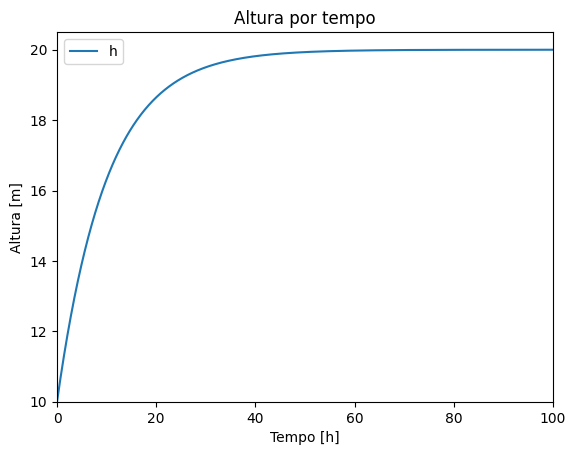

In [29]:
IC = [10]
int = (0, 100)
t, h = rk4(edo2_1, IC, int)

fig, ax = plt.subplots()
ax.plot(t, h[0], label='h')
ax.set_title('Altura por tempo')
ax.set_xlabel('Tempo [h]')
ax.set_ylabel('Altura [m]')
ax.axis([*int, 10, 20.5])
ax.legend()
plt.show()

In [30]:
def edo3_1(x, y):
    t = x
    x = y[0]
    Qin1 = 1
    Qin2 = 1
    Qout = 2
    x1 = 0.02
    x2 = 0.03
    V = 5
    dx = (1 / V) * ((Qin1*x1 + Qin2*x2) - Qout*x)
    return [dx]

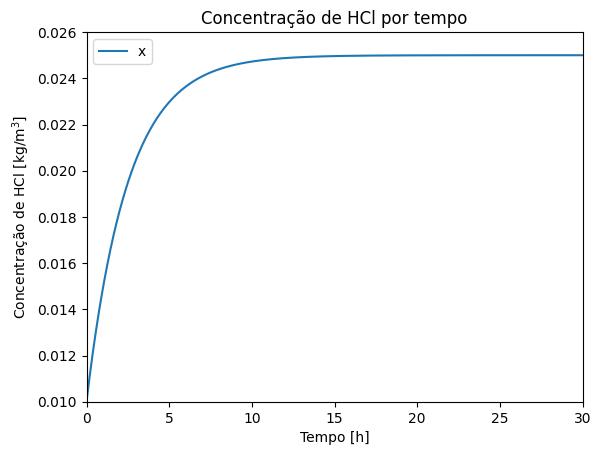

In [31]:
IC = [0.01]
int = (0, 30)
t, x = rk4(edo3_1, IC, int)

fig, ax = plt.subplots()
ax.plot(t, x[0], label='x')
ax.set_title('Concentração de HCl por tempo')
ax.set_xlabel('Tempo [h]')
ax.set_ylabel(r'Concentração de HCl [kg/m$^3$]')
ax.axis([*int, 0.01, 0.026])
ax.legend()
plt.show()

In [32]:
def edo3_3a(x, y):
    t = x
    V = y[0]
    T = y[1]
    Q = 0.5
    Qin = 2 * Q
    Qout1 = Q
    Qout2 = Q
    Tin = 273.15 + 30
    dV = Qin - (Qout1 + Qout2)
    dT = (1 / V) * (Qin*Tin - (Qout1*T + Qout2*T) - T*dV)
    return [dV, dT]

def edo3_3c(x, y):
    t = x
    V = y[0]
    T = y[1]
    Q = 0.5
    Qin = 2 * Q
    Qout1 = Q
    Qout2 = 0
    Tin = 273.15 + 30
    dV = Qin - (Qout1 + Qout2)
    dT = (1 / V) * (Qin*Tin - (Qout1*T + Qout2*T) - T*dV)
    return [dV, dT]

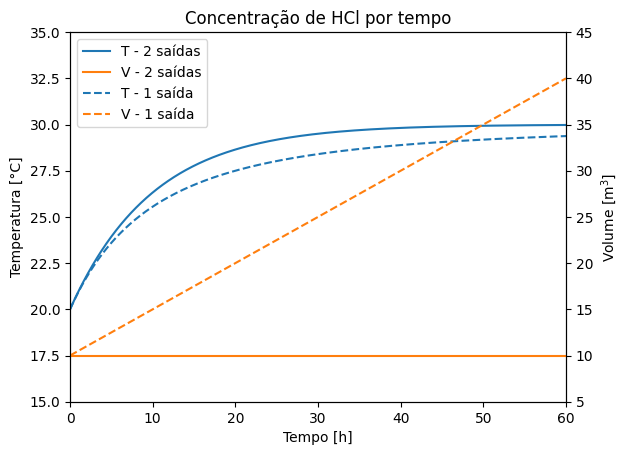

In [33]:
IC = [10, 20 + 273.15]
int = (0, 60)
t, (Va, Ta) = rk4(edo3_3a, IC, int)
t, (Vc, Tc) = rk4(edo3_3c, IC, int)

fig, ax1 = plt.subplots()
la1, = ax1.plot(t, Ta - 273.15, color='C0')
lc1, = ax1.plot(t, Tc - 273.15, color='C0', linestyle='--')
ax2 = ax1.twinx()
la2, = ax2.plot(t, Va, color='C1')
lc2, = ax2.plot(t, Vc, color='C1', linestyle='--')
ax1.set_title('Concentração de HCl por tempo')
ax1.set_xlabel('Tempo [h]')
ax1.set_ylabel('Temperatura [°C]')
ax2.set_ylabel(r'Volume [m$^3$]')
ax1.set_xlim(*int)
ax1.set_ylim([15, 35])
ax2.set_ylim([5, 45])
ax1.legend([la1, la2, lc1, lc2], ['T - 2 saídas', 'V - 2 saídas', 'T - 1 saída', 'V - 1 saída'])
plt.show()

In [34]:
def edo3_4_troca_termica(x, y):
    t = x
    V = y[0]
    x = y[1]
    T = y[2]
    Qin = 2
    Qout = 1
    xin = 0.02
    Tin = 330
    rho = 1000
    cp = 4184
    U = 30 * 3600
    A = 40
    Tinf = 300
    dV = Qin - Qout
    dx = (1 / V) * (Qin*xin - Qout*x - x*dV)
    dT = (1 / V) * (Qin*Tin - Qout*T - (U * A)/(rho * cp)*(T - Tinf) - T*dV)
    return [dV, dx, dT]

def edo3_4_adiabatico(x, y):
    t = x
    V = y[0]
    x = y[1]
    T = y[2]
    Qin = 2
    Qout = 1
    xin = 0.02
    Tin = 330
    rho = 1000
    cp = 4184
    U = 0
    A = 40
    Tinf = 300
    dV = Qin - Qout
    dx = (1 / V) * (Qin*xin - Qout*x - x*dV)
    dT = (1 / V) * (Qin*Tin - Qout*T - (U * A)/(rho * cp)*(T - Tinf) - T*dV)
    return [dV, dx, dT]

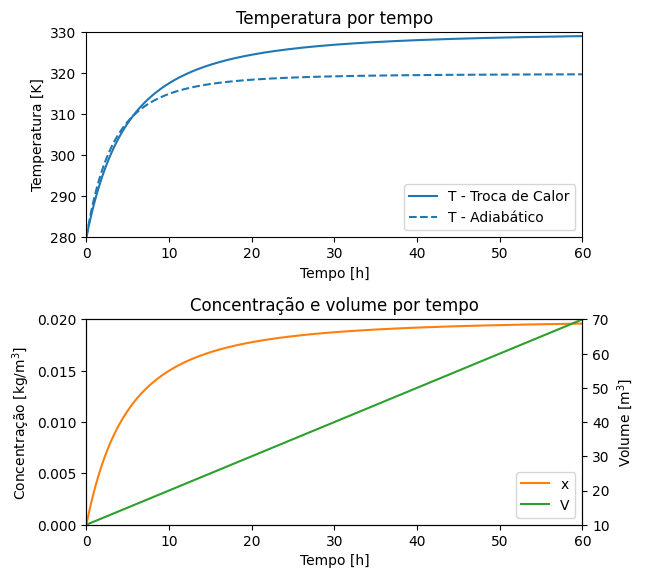

In [35]:
IC = [10, 0, 280]
int = (0, 60)
t, y_tt = rk4(edo3_4_troca_termica, IC, int)
t, y_a = rk4(edo3_4_adiabatico, IC, int)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 6.4))
l1, = ax1.plot(t, y_a[2], color='C0')
l2, = ax1.plot(t, y_tt[2], color='C0', linestyle='--')
ax1.set_title('Temperatura por tempo')
ax1.set_xlabel('Tempo [h]')
ax1.set_ylabel('Temperatura [K]')
ax1.axis([*int, 280, 330])
ax1.legend([l1, l2], ['T - Troca de Calor', 'T - Adiabático'], loc='lower right')

l3, = ax2.plot(t, y_a[1], color='C1')
ax3 = ax2.twinx()
l4, = ax3.plot(t, y_a[0], color='C2')
ax2.set_xlim(*int)
ax3.set_ylim(10, 70)
ax2.set_ylim(0, 0.02)
ax2.set_title('Concentração e volume por tempo')
ax2.set_xlabel('Tempo [h]')
ax2.set_ylabel(r'Concentração [kg/m$^3$]')
ax3.set_ylabel(r'Volume [m$^3$]')
ax2.legend([l3, l4], ['x', 'V'], loc='lower right')

fig.subplots_adjust(hspace=0.4)
plt.show()

In [36]:
def edo3_7(x, y):
    t = x
    T1 = y[0]
    T2 = y[1]
    T3 = y[2]
    T0 = 20 + 273
    W = 100
    m = 1000
    cp = 2
    UA = 10
    Tsteam = 250 + 273.15
    dT1 = (W / m) * (T0 - T1) - (UA) / (m * cp) * (T1 - Tsteam)
    dT2 = (W / m) * (T1 - T2) - (UA) / (m * cp) * (T2 - Tsteam)
    dT3 = (W / m) * (T2 - T3) - (UA) / (m * cp) * (T3 - Tsteam)
    return [dT1, dT2, dT3]

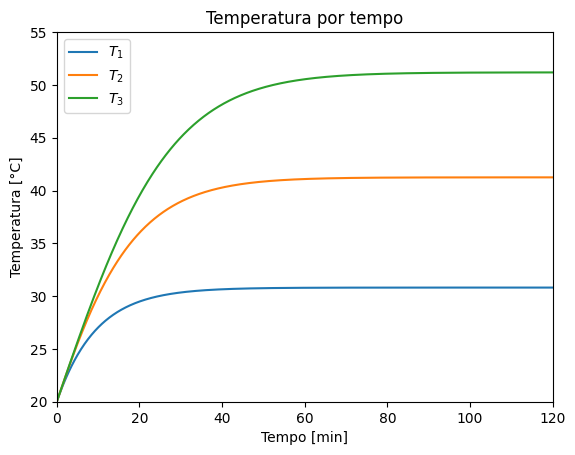

In [37]:
IC = 3 * [20 + 273.15]
int = (0, 120)
t, Temp = rk4(edo3_7, IC, int)
gera_dados_edo(t, Temp)
labels = [r'$T_1$', r'$T_2$', r'$T_3$']

fig, ax = plt.subplots()
for T, label in zip(Temp, labels):
    ax.plot(t, T - 273.15, label=label)
ax.set_title('Temperatura por tempo')
ax.set_xlabel('Tempo [min]')
ax.set_ylabel('Temperatura [°C]')
ax.axis([*int, 20, 55])
ax.legend()
plt.show()

In [38]:
def edo3_8(x, y):
    t = x
    Ca = y[0]
    Cb = y[1]
    Cc = y[2]
    Cd = y[3]
    Cain = 0.7
    Cbin = 0.4
    Ccin = 0
    Cdin = 0
    F = 5
    V = 40
    k = 0.855 * 60
    dCa = (F / V) * (Cain - Ca) - k * Ca * Cb
    dCb = (F / V) * (Cbin - Cb) - k * Ca * Cb
    dCc = (F / V) * (Ccin - Cc) + k * Ca * Cb
    dCd = (F / V) * (Cdin - Cd) + k * Ca * Cb
    return [dCa, dCb, dCc, dCd]

(0, 60)


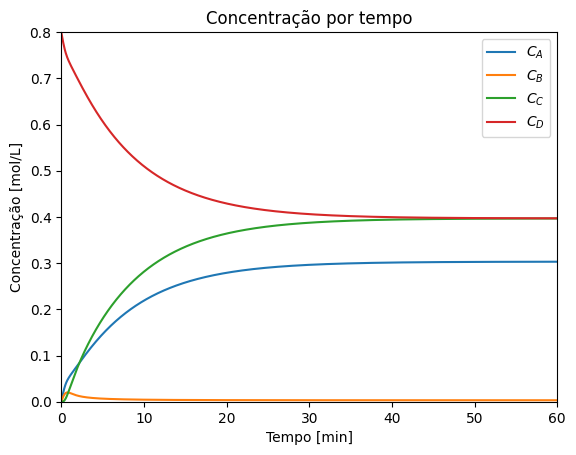

In [50]:
IC = [0, 0, 0, 0.8]
int = (0, 60)
t, C = euler(edo3_8, IC, int)

labels = [r'$C_A$', r'$C_B$', r'$C_C$', r'$C_D$']

fig, ax = plt.subplots()
for c, label in zip(C, labels):
    ax.plot(t, c, label=label)
ax.set_title('Concentração por tempo')
ax.set_xlabel('Tempo [min]')
ax.set_ylabel('Concentração [mol/L]')
ax.axis([*int, 0, 0.8])
ax.legend()
print(int)
plt.show()

In [40]:
n, m = (102, 102)
T_left, T_right, T_top, T_down = (75, 50, 100, 0)

M = np.zeros((n, m))
M[1:n-1, 0] = T_left
M[1:n-1, -1] = T_right
M[0, 1:m-1] = T_top
M[-1, 1:m-1] = T_down
MM = M.copy()
MM[1:n-1, 1:m-1] = math.nan

B = np.zeros((n, m))
for i in range(1, n-1):
    for j in range(1, m-1):
        B[i, j] = M[i-1, j] + M[i+1, j] + M[i, j+1] + M[i, j-1]
B = B[1:n-1, 1:m-1].reshape(1, (n-2)*(m-2))[0]

A = list()
for i in range(1, n-1):
    for j in range(1, m-1):
        R = np.zeros((n-1, m-1))
        R[i, j] = 4
        if math.isnan(MM[i-1, j]):
            R[i-1, j] = -1
        if math.isnan(MM[i+1, j]):
            R[i+1, j] = -1
        if math.isnan(MM[i, j-1]):
            R[i, j-1] = -1
        if math.isnan(MM[i, j+1]):
            R[i, j+1] = -1
        R = R[1:n-1, 1:m-1].transpose().reshape(1, (n-2)*(m-2))[0]
        A.append(R)
A = np.array(A)
# A[7, 2] = 0
# A[7, 0] = -1

X = linalg.inv(A) @ B
X = X.reshape((n-2, m-2)).transpose()

# print(A)
# print(B)
# print(X)

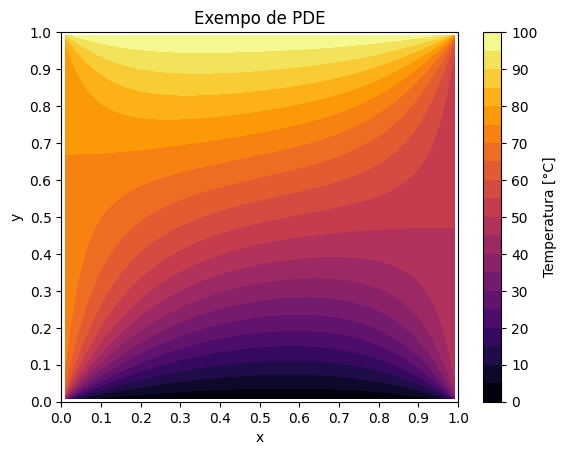

In [41]:
x = np.linspace(0, 1, n)
y = np.linspace(1, 0, m)
x, y = np.meshgrid(x[1:-1], y[1:-1])

fig, ax = plt.subplots()
pc = ax.contourf(x, y, X, cmap='inferno', levels=np.linspace(0, 100, 21))
fig.colorbar(pc, ax=ax, ticks=np.linspace(0, 100, 11), label='Temperatura [°C]')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('Exempo de PDE')
ax.set_xticks(np.arange(0, 1.1, .1))
ax.set_yticks(np.arange(0, 1.1, .1))
plt.show()

In [42]:
def edp1(x, y):
    t = x
    k = 1
    rho = 1
    cp = 1
    return

In [43]:
F = 70
A = np.array([[0.07, 0.18, 0.15, 0.24],
              [0.04, 0.24, 0.10, 0.65],
              [0.54, 0.42, 0.54, 0.10],
              [0.35, 0.16, 0.21, 0.01]])
B = np.array([0.15, 0.25, 0.40, 0.20]) * F
X = linalg.inv(A) @ B
print(X)

[26.25 17.5   8.75 17.5 ]


In [44]:
X2 = linalg.inv(A.T @ A) @ A.T @ B
print(X2)

[26.25 17.5   8.75 17.5 ]


In [45]:
from scipy.optimize import fsolve

In [46]:
def model1(X):
    F2, F3 = X
    F1 = 1234
    x1 = 0.2
    x3 = 0.05
    eq1 = F1 + F2 - F3
    eq2 = x1*F1 - x3*F3
    return [eq1, eq2]

F2, F3 = fsolve(model1, [100, 100])

print(F2)
print(F3)

3702.0
4936.0


In [47]:
def model2(X):
    F2, F3 = X
    xa1, xa2, xa3 = 2/100, 80/100, 0.08/100
    F1 = 20
    eq1 = F1 - F2 - F3
    eq2 = xa1*F1 - xa2*F2 - xa3*F3
    return [eq1, eq2]

F2, F3 = fsolve(model2, [10, 10])

print(F2)
print(F3)

0.48048048048048053
19.51951951951952


In [48]:
def model3(X):
    FR, FP = X
    FM, alpha = 100, 0.3
    eq1 = FM - FP
    eq2 = alpha*(FM + FR) - FP
    return [eq1, eq2]

FR, FP = fsolve(model3, [100, 100])

print(FR)
print(FP)

233.33333333333331
100.0


In [49]:
def model4(X):
    FR, FP = X
    FM, alpha = 100, 0.6
    eq1 = FM - FP
    eq2 = 0.95*FP - alpha*(FM + FR)
    return [eq1, eq2]

FR, FP = fsolve(model4, [100, 100])

print(FR)
print(FP)

58.333333333333336
100.0


In [53]:
def edo_trocador_de_calor(t, y):
    x = t
    Tb, Tt = y
    Wben = 9820
    Wtol = 6300
    Cpben = 0.425
    Cptol = 0.440
    U = 0.8
    Mb = 1.25 * np.pi * U / (Wben * Cpben)
    Mt = 1.25 * np.pi * U / (Wtol * Cptol)
    dTbdx = Mb * (Tt - Tb)
    dTtdx = Mt * (Tb - Tt)
    return [dTbdx, dTtdx]

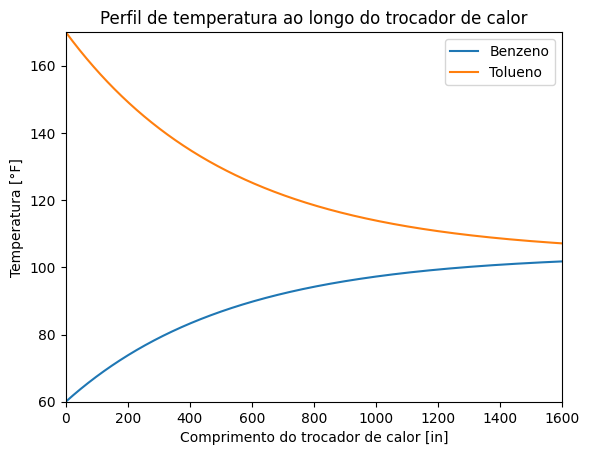

In [56]:
IC = [60, 170]
int = [0, 1600]
x, T = rk4(edo_trocador_de_calor, IC, int)
Tb, Tt = T

fig, ax = plt.subplots()
ax.plot(x, Tb, label='Benzeno')
ax.plot(x, Tt, label='Tolueno')
ax.set_title('Perfil de temperatura ao longo do trocador de calor')
ax.set(xlim=int, ylim=IC, xlabel='Comprimento do trocador de calor [in]', ylabel='Temperatura [°F]')
ax.legend()
plt.show()

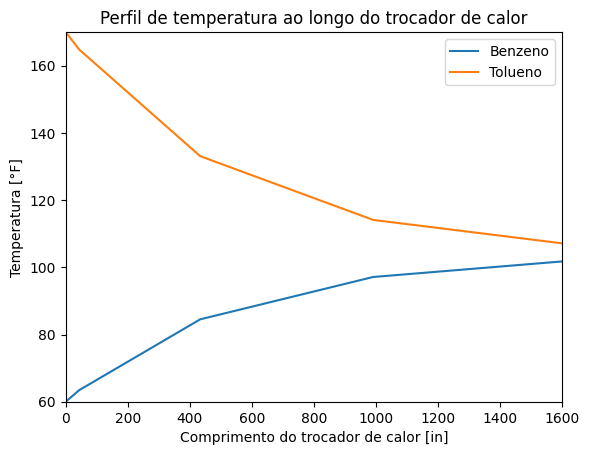

In [57]:
from scipy.integrate import solve_ivp

IC = [60, 170]
int = [0, 1600]
x, T = rk4(edo_trocador_de_calor, IC, int)

sol = solve_ivp(fun=edo_trocador_de_calor, t_span=int, y0=IC, method='RK45')
x = sol.t
Tb, Tt = sol.y

fig, ax = plt.subplots()
ax.plot(x, Tb, label='Benzeno')
ax.plot(x, Tt, label='Tolueno')
ax.set_title('Perfil de temperatura ao longo do trocador de calor')
ax.set(xlim=int, ylim=IC, xlabel='Comprimento do trocador de calor [in]', ylabel='Temperatura [°F]')
ax.legend()
plt.show()